In [170]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import pandas

In [171]:
x = np.random.uniform(0, 10, 80)
y = np.random.uniform(0, 10, 80)
t = np.linspace(0, 200, 80)

In [172]:
tnew = np.linspace(t[0], t[-1], 10000)

In [173]:
sx = interpolate.InterpolatedUnivariateSpline(t, x)
xnew = sx(tnew)

sy = interpolate.InterpolatedUnivariateSpline(t, y)
ynew = sy(tnew)

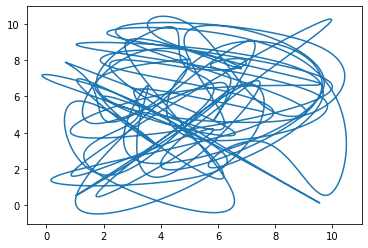

In [174]:
plt.plot(xnew, ynew)

In [182]:
v = np.hstack(([0], np.sqrt(np.diff(xnew)**2 + np.diff(ynew)**2)))
vb = (v - 0.06)>0

In [183]:
odor = np.sin(xnew)*np.sin(ynew)
odor[odor<0] = 0
odor += vb
odor += np.random.normal(0, 0.05, len(odor))

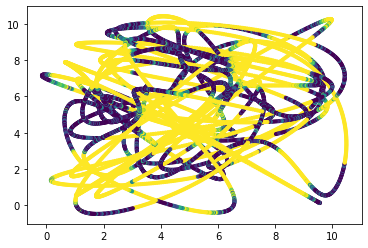

In [184]:
plt.scatter(xnew, ynew, c=odor, s=10, vmin=0, vmax=0.2)

In [185]:
df = pandas.DataFrame({'time': tnew,
                       'xpos': xnew,
                       'ypos': ynew,
                       'c': odor})

In [186]:
df.to_hdf('sample_data.hdf', 'data')